<h1>Feature Selection Using Most Important Features</h1>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

<h3>A - Import data</h3>

In [2]:
features_names = [
    'month-day',
    'month',
    'day_in_month',
    'adep', 
    'country_code_adep', 
    'ades', 
    'country_code_ades', 
    'aircraft_type', 
    'wtc', 
    'airline', 
    'flight_duration', 
    'taxiout_time', 
    'flown_distance', 
    'actual_offblock_time_hour', 
    'actual_offblock_time_minute', 
    'actual_offblock_time_hour_minute', 
    'arrival_time_hour', 
    'arrival_time_minute', 
    'arrival_time_hour_minute', 
    'latitude_median', 
    'longitude_median', 
    'altitude_mean', 
    'groundspeed_mean', 
    'track_mean', 
    'vertical_rate_mean', 
    'track_unwrapped_mean', 
    'u_component_of_wind_mean', 
    'v_component_of_wind_mean', 
    'temperature_mean', 
    'specific_humidity_mean'
]

<h3>B - Prepare training and test data</h3>

In [3]:
encoded_challenge_set = pd.read_csv('../data/encoded_challenge_set.csv')

features = encoded_challenge_set[features_names]

target = encoded_challenge_set['tow']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=123, shuffle=True)

<h3>C - Train a RandomForestRegressor</h3>

In [4]:
rf = RandomForestRegressor(
    n_estimators=11, # From elbow graph in CV Grid Search 
)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=11)

<h3>D - Evaluate the built model using RMSE</h3>

In [5]:
# Function to score model using Root Mean Square Error
def rmse(y_true: pd.Series, y_pred: pd.Series) -> int:
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [6]:
y_pred = rf.predict(X_test)
test_rmse = rmse(y_test, y_pred)
print("Test RMSE: ", test_rmse)

Test RMSE:  3699.1735853651644


<h3>E - View feature importance</h3>

In [7]:
ft_imp = pd.Series(rf.feature_importances_, index=features_names).sort_values(ascending=False)
display(ft_imp)

wtc                                 0.854123
aircraft_type                       0.075832
flown_distance                      0.041067
airline                             0.013084
flight_duration                     0.005716
longitude_median                    0.001436
month-day                           0.000892
country_code_ades                   0.000864
country_code_adep                   0.000808
altitude_mean                       0.000721
adep                                0.000713
ades                                0.000582
latitude_median                     0.000464
arrival_time_hour_minute            0.000352
actual_offblock_time_hour_minute    0.000337
track_mean                          0.000308
vertical_rate_mean                  0.000292
specific_humidity_mean              0.000263
temperature_mean                    0.000257
track_unwrapped_mean                0.000242
u_component_of_wind_mean            0.000240
v_component_of_wind_mean            0.000239
groundspee

<h3>F - Train several models top compare with by adding one important feature at a time</h3>

In [8]:
sorted_important_features = ft_imp.index.tolist()
number_of_top_features = []
rmse_scores = []

for n in range(1, len(sorted_important_features)+1):
    current_top_features = ft_imp.index[:n].tolist()

    features = encoded_challenge_set[current_top_features]
    
    target = encoded_challenge_set['tow']
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=123, shuffle=True)
    
    rf = RandomForestRegressor(
        n_estimators=11, # From elbow graph in CV Grid Search 
    )
    
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    test_rmse = rmse(y_test, y_pred)

    number_of_top_features.append(n)
    rmse_scores.append(test_rmse)
    
    print(f"Number of top features: {n}, Test RMSE: {test_rmse}")

Number of top features: 1, Test RMSE: 20482.737093405012
Number of top features: 2, Test RMSE: 10925.282505157447
Number of top features: 3, Test RMSE: 7067.991156597818
Number of top features: 4, Test RMSE: 5162.66125813047
Number of top features: 5, Test RMSE: 4983.407137815803
Number of top features: 6, Test RMSE: 4653.733009405498
Number of top features: 7, Test RMSE: 4102.283604345339
Number of top features: 8, Test RMSE: 3967.1306320023473
Number of top features: 9, Test RMSE: 3886.408501871118
Number of top features: 10, Test RMSE: 3831.1472418760372
Number of top features: 11, Test RMSE: 3775.5267005402493
Number of top features: 12, Test RMSE: 3719.150874099755
Number of top features: 13, Test RMSE: 3722.740792568542
Number of top features: 14, Test RMSE: 3667.1037468088416
Number of top features: 15, Test RMSE: 3669.327155388487
Number of top features: 16, Test RMSE: 3649.959061137611
Number of top features: 17, Test RMSE: 3656.0584854988306
Number of top features: 18, Test R

<h3>G - Plot the results</h3>

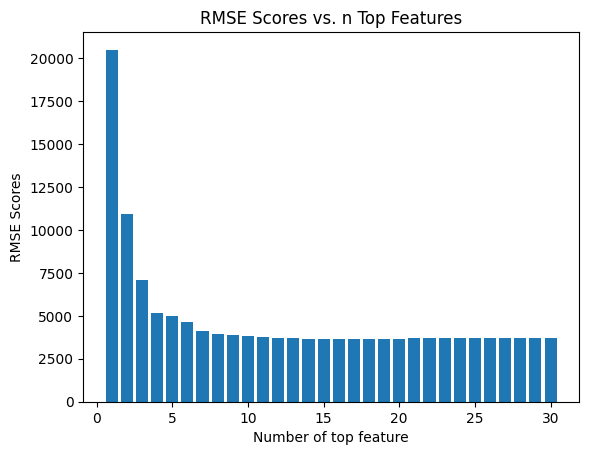

In [9]:
plt.bar(number_of_top_features, rmse_scores)
plt.xlabel('Number of top feature')
plt.ylabel('RMSE Scores')
plt.title('RMSE Scores vs. n Top Features')
plt.show()

<strong>We notice that the top 19 important features gives us the lowest RMSE score at 3645, so maybe it is a goode idea to train a model using the top 19 features to reduce dimentionality</strong>